✅ Data loaded successfully!
✅ Train size: (23624, 15), Test size: (5907, 15)
✅ Scaler saved at: ../models/scaler.pkl


C:\Users\Boopathi Kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Model compiled successfully!
Epoch 1/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 24562.8164 - mae: 109.4200 - val_loss: 4187.3511 - val_mae: 36.9819
Epoch 2/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4566.9951 - mae: 38.8812 - val_loss: 3389.6367 - val_mae: 32.1202
Epoch 3/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4013.6526 - mae: 35.4851 - val_loss: 3413.5376 - val_mae: 32.1987
Epoch 4/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3743.2898 - mae: 34.9676 - val_loss: 3200.2542 - val_mae: 30.6568
Epoch 5/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3958.9526 - mae: 34.7590 - val_loss: 2978.9751 - val_mae: 29.1509
Epoch 6/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4104.8276 - mae: 34.6221 - val_loss: 2943.7227 - val_mae: 29.5716
Epoch 7/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3645.7947 - mae: 33.5519 - val_loss: 2848.7490 - val_mae: 28.8887
Epoch 8/100
591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3447.7534 - mae: 

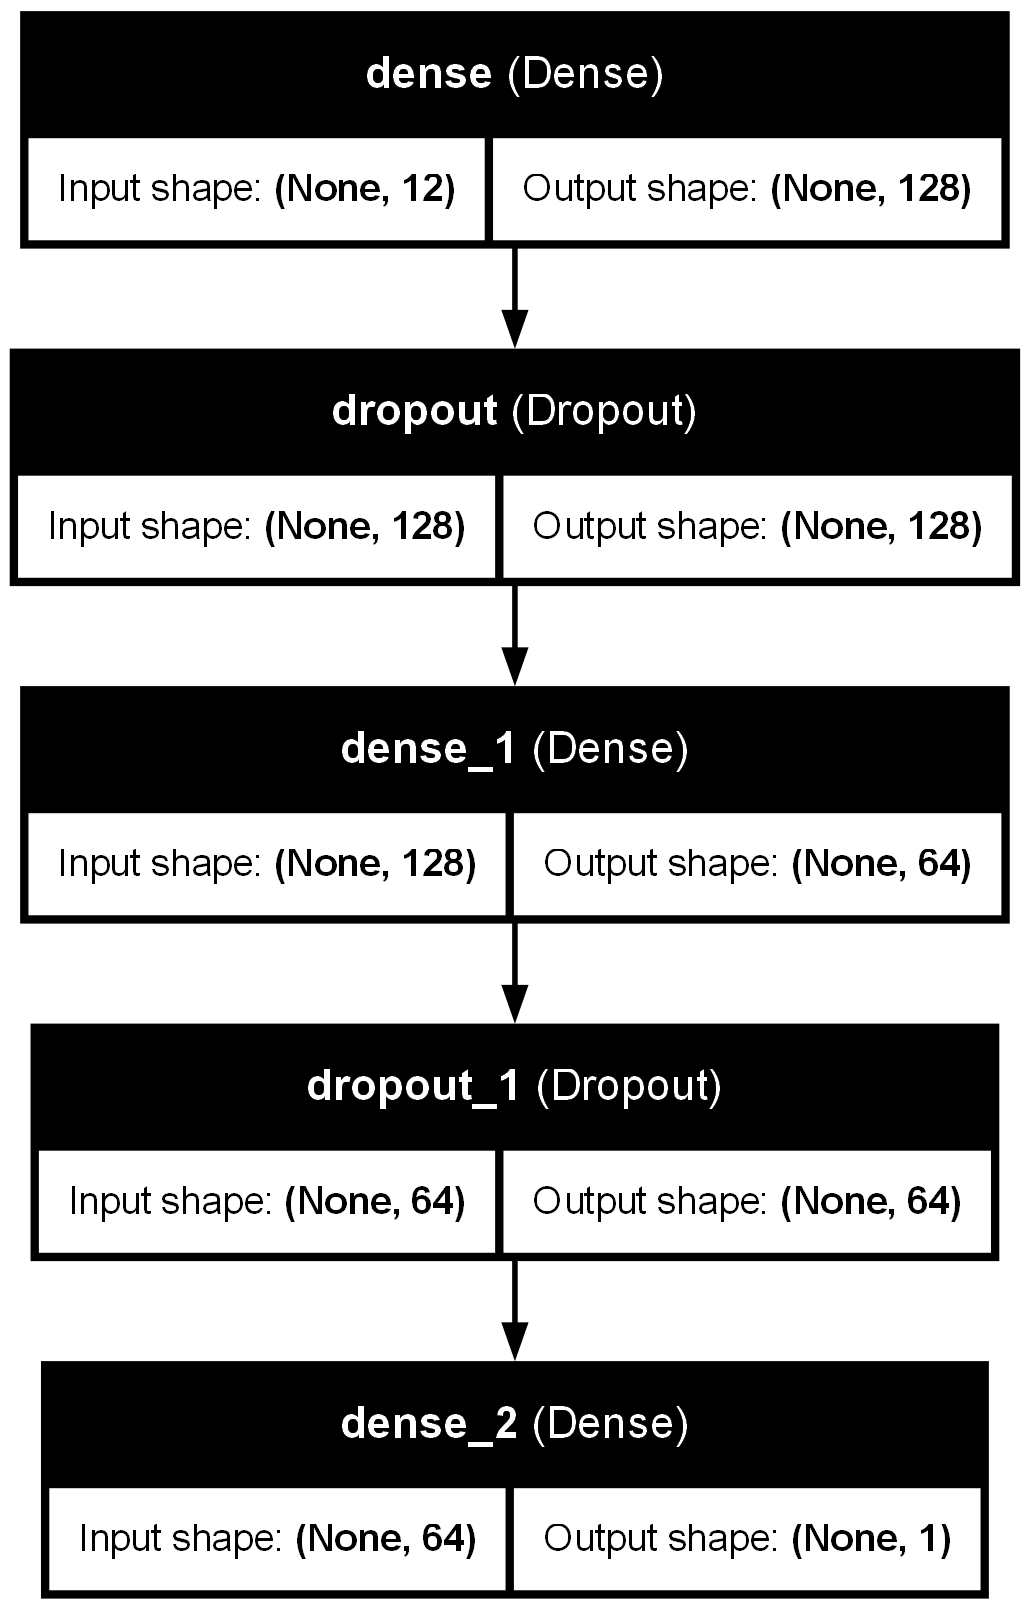

In [1]:
# ------------------------
# 📌 Step 1: Import Libraries
# ------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import joblib
import os

# ------------------------
# 📌 Step 2: Load Processed Data
# ------------------------
data_path = "../data/processed/processed.csv"
df = pd.read_csv(data_path)
print("✅ Data loaded successfully!")

# ------------------------
# 📌 Step 3: Prepare Features and Target
# ------------------------
target_col = "AQI"
X = df.drop(columns=[target_col])
y = df[target_col]

# ------------------------
# 📌 Step 4: Train-Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Train size: {X_train.shape}, Test size: {X_test.shape}")

# ------------------------
# 📌 Step 5: Feature Scaling
# ------------------------
# Drop non-numeric columns before scaling
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
scaler_path = "../models/scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved at: {scaler_path}")

# ------------------------
# 📌 Step 6: Build Neural Network Model
# ------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print("✅ Model compiled successfully!")

# ------------------------
# 📌 Step 7: Train the Model
# ------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)
print("✅ Model training completed!")

# ------------------------
# 📌 Step 8: Save the Model
# ------------------------
model_path = "../models/neural_network_model.keras"
model.save(model_path)
print(f"✅ Model saved at: {model_path}")

# Optional: Check size of saved model
model_size = os.path.getsize(model_path) / (1024 * 1024)
print(f"📦 Model size: {model_size:.2f} MB")

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)



